Install gensim library

In [1]:
pip install gensim

   ---------------------------------------- 0.0/24.0 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.0 MB 3.5 MB/s eta 0:00:07
    --------------------------------------- 0.5/24.0 MB 5.6 MB/s eta 0:00:05
   - -------------------------------------- 1.0/24.0 MB 7.3 MB/s eta 0:00:04
   -- ------------------------------------- 1.6/24.0 MB 7.6 MB/s eta 0:00:03
   --- ------------------------------------ 1.9/24.0 MB 8.1 MB/s eta 0:00:03
   --- ------------------------------------ 2.4/24.0 MB 8.4 MB/s eta 0:00:03
   ---- ----------------------------------- 2.9/24.0 MB 8.7 MB/s eta 0:00:03
   ----- ---------------------------------- 3.3/24.0 MB 8.9 MB/s eta 0:00:03
   ------ --------------------------------- 3.7/24.0 MB 8.8 MB/s eta 0:00:03
   ------ --------------------------------- 4.1/24.0 MB 8.8 MB/s eta 0:00:03
   ------- -------------------------------- 4.6/24.0 MB 9.0 MB/s eta 0:00:03
   -------- ------------------------------- 5.2/24.0 MB 8.9 MB/s eta 0:00:03
   ---

In [2]:
from gensim.models import Word2Vec

In [3]:
sentences = [
    'The quick brown fox jumps over the lazy dog.',
    'I like eating apples and bananas.',
    'natural language processing is a fascinating field.'
]

In [4]:
from nltk.tokenize import word_tokenize

In [5]:
final_data = []
for sent in sentences:
    final_data.append(word_tokenize(sent))

In [6]:
final_data

[['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.'],
 ['I', 'like', 'eating', 'apples', 'and', 'bananas', '.'],
 ['natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field', '.']]

In [13]:
# Create the object
model = Word2Vec(final_data, min_count=1, vector_size=10)

In [14]:
model.wv['apples']

array([ 0.07898068, -0.06989504, -0.09155865, -0.00355753, -0.03099841,
        0.07894317,  0.05938574, -0.01545663,  0.01510963,  0.01790041],
      dtype=float32)

In [17]:
model.wv['bananas']

array([-0.08534335,  0.03207107, -0.04637997, -0.05088955,  0.03589618,
        0.05370339,  0.07769515, -0.05766506,  0.07433361,  0.06625496],
      dtype=float32)

In [18]:
def get_embedding(word):
    try:
        word_embedding = model.wv[word]
        print(f'Word embedding for "{word}": {word_embedding}')
    except KeyError:
        print(f'Word "{word}" nor found in the Vocab.')

In [23]:
get_embedding('fox')

Word embedding for "fox": [-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]


In [24]:
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
cosine_similarity(model.wv['apples'].reshape(1,-1), 
                  model.wv['bananas'].reshape(1,-1))

array([[0.18977958]], dtype=float32)

In [27]:
cosine_similarity(model.wv['fox'].reshape(1,-1), 
                  model.wv['dog'].reshape(1,-1))

array([[0.2238495]], dtype=float32)

In [34]:
cosine_similarity(model.wv['quick'].reshape(1,-1), 
                  model.wv['fox'].reshape(1,-1))

array([[0.09267306]], dtype=float32)

In [29]:
cosine_similarity(model.wv['brown'].reshape(1,-1), 
                  model.wv['fox'].reshape(1,-1))

array([[0.24963574]], dtype=float32)

In [35]:
cosine_similarity(model.wv['lazy'].reshape(1,-1), 
                  model.wv['dog'].reshape(1,-1))

array([[-0.15246896]], dtype=float32)

In [36]:
import nltk
nltk.download('abc')

[nltk_data] Downloading package abc to C:\Users\Administrator.DAI-
[nltk_data]     PC2\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\abc.zip.


True

In [37]:
from nltk.corpus import abc

In [38]:
sents = abc.sents()

In [39]:
sents

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ...]

In [40]:
len(sents)

29059

In [41]:
# Create the model
model = Word2Vec(sents, min_count=1, vector_size=10)

In [42]:
model.wv.key_to_index

{'the': 0,
 '.': 1,
 ',': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'in': 7,
 "'": 8,
 'is': 9,
 'says': 10,
 '"': 11,
 'that': 12,
 's': 13,
 'for': 14,
 'The': 15,
 '-': 16,
 'are': 17,
 'it': 18,
 'be': 19,
 'have': 20,
 ',"': 21,
 'on': 22,
 'from': 23,
 'with': 24,
 'has': 25,
 'at': 26,
 'he': 27,
 'as': 28,
 'will': 29,
 'they': 30,
 'by': 31,
 'not': 32,
 'said': 33,
 'been': 34,
 'we': 35,
 'this': 36,
 'an': 37,
 'more': 38,
 'Australia': 39,
 'their': 40,
 'was': 41,
 'or': 42,
 'which': 43,
 'can': 44,
 'about': 45,
 'up': 46,
 'there': 47,
 'but': 48,
 'than': 49,
 'could': 50,
 'But': 51,
 'Australian': 52,
 '."': 53,
 'new': 54,
 'were': 55,
 'also': 56,
 'one': 57,
 't': 58,
 'out': 59,
 'years': 60,
 'I': 61,
 'say': 62,
 'its': 63,
 'It': 64,
 'year': 65,
 'people': 66,
 'would': 67,
 'water': 68,
 'into': 69,
 'some': 70,
 'other': 71,
 'had': 72,
 'you': 73,
 'who': 74,
 'found': 75,
 'A': 76,
 'like': 77,
 'We': 78,
 'over': 79,
 'may': 80,
 'so': 81,
 'researche

In [43]:
len(model.wv.key_to_index)

31885

In [44]:
data = model.wv.most_similar('science')
print(data)

[('authority', 0.9830944538116455), ('capitalise', 0.9744731187820435), ('Dubbo', 0.9722586870193481), ('arousal', 0.970732569694519), ('Hofmann', 0.9698029160499573), ('leading', 0.9695888161659241), ('Women', 0.9653311967849731), ('nurse', 0.9650930166244507), ('bulk', 0.9643355011940002), ('publisher', 0.9622171521186829)]


In [46]:
data = model.wv.most_similar('dance')
print(data)

[('entering', 0.9732388257980347), ('Cazaly', 0.9728684425354004), ('al', 0.9712316393852234), ('importance', 0.9704961776733398), ('radioactive', 0.9697390198707581), ('acknowledged', 0.9691632986068726), ('1st', 0.9673900008201599), ('son', 0.9666699171066284), ('porous', 0.9659519195556641), ('Athens', 0.9658749103546143)]


In [47]:
model.wv['science'], model.wv['publisher']

(array([ 0.1384679 ,  0.14317316,  2.3043413 ,  0.05461849, -0.36673814,
        -0.61108553,  1.72746   ,  1.1283735 , -1.3800551 , -0.40287578],
       dtype=float32),
 array([-0.0004753 , -0.01236063,  0.21718599,  0.02552118, -0.08153367,
        -0.07375621,  0.16011836,  0.04746789, -0.16115974, -0.06149316],
       dtype=float32))

Reading the Data and Train the Word2Vec

In [48]:
import json
with open('intents.json', 'r') as f:
    data = json.load(f)

In [49]:
type(data)

list

In [51]:
data

[{'tag': 'welcome',
  'patterns': ['Hi',
   'How are you',
   'Is any one to talk?',
   'Hello',
   'hi are you available'],
  'responses': ['Hello, thanks for contacting us',
   'Good to see you here',
   ' Hi there, how may I assist you?']},
 {'tag': 'goodbye',
  'patterns': ['Bye', 'See you later', 'Goodbye', 'I will come back soon'],
  'responses': ['See you later, thanks for visiting',
   'have a great day ahead',
   'Wish you Come back again soon.']},
 {'tag': 'thankful',
  'patterns': ['Thanks for helping me',
   'Thank your guidance',
   "That's helpful and kind from you"],
  'responses': ['Happy to help!',
   'Any time!',
   'My pleasure',
   'It is my duty to help you']},
 {'tag': 'hoursopening',
  'patterns': ['What hours are you open?',
   'Tell your opening time?',
   'When are you open?',
   'Just your timing please'],
  'responses': ["We're open every day 8am-7pm",
   'Our office hours are 8am-7pm every day',
   'We open office at 8 am and close at 7 pm']},
 {'tag': 'pay

In [52]:
data[0]

{'tag': 'welcome',
 'patterns': ['Hi',
  'How are you',
  'Is any one to talk?',
  'Hello',
  'hi are you available'],
 'responses': ['Hello, thanks for contacting us',
  'Good to see you here',
  ' Hi there, how may I assist you?']}

In [53]:
data[0]['patterns']

['Hi', 'How are you', 'Is any one to talk?', 'Hello', 'hi are you available']

In [54]:
data[0]['responses']

['Hello, thanks for contacting us',
 'Good to see you here',
 ' Hi there, how may I assist you?']

In [103]:
import pandas as pd
df = pd.DataFrame(data)

In [104]:
df

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [105]:
df['patterns'] = df['patterns'].apply(', '.join)

In [106]:
df

,tag,patterns,responses
0,welcome,"Hi, How are you, Is any one to talk?, Hello, h...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"Bye, See you later, Goodbye, I will come back ...","[See you later, thanks for visiting, have a gr..."
2,thankful,"Thanks for helping me, Thank your guidance, Th...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"What hours are you open?, Tell your opening ti...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"Can I pay using credit card?, Can I pay using...","[We accept VISA, Mastercard and credit card, W..."


In [107]:
from nltk.corpus import stopwords
from textblob import Word
import string

stop = stopwords.words('english')
df['patterns'] = df['patterns'].apply(
    lambda x: ' '.join(x.lower() for x in x.split()))
df['patterns'] = df['patterns'].apply(
    lambda x: ' '.join(x for x in word_tokenize(x) if x not in string.punctuation))
df['patterns'] = df['patterns'].str.replace('[^\w\s]', '')
df['patterns'] = df['patterns'].apply(
    lambda x: " ".join(x for x in word_tokenize(x) if not x.isdigit()))
df['patterns'] = df['patterns'].apply(
    lambda x: " ".join(x for x in word_tokenize(x) if not x in stop))
df['patterns'] = df['patterns'].apply(
    lambda x: " ".join([Word(word).lemmatize(pos='v') for word in word_tokenize(x)]))


In [118]:
df

,tag,patterns,responses
0,welcome,hi one talk hello hi available,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,bye see later goodbye come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,thank help thank guidance 's helpful kind,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,hours open tell open time open time please,"[We're open every day 8am-7pm, Our office hour..."
4,payments,pay use credit card pay use mastercard pay use...,"[We accept VISA, Mastercard and credit card, W..."


In [109]:
w = Word('playing')
w.lemmatize(pos='v')

'play'

In [110]:
# taking the outer list
bigger_list=[]
for i in df['patterns']:
    li = i.split()
    bigger_list.append(li)

In [111]:
bigger_list

[['hi', 'one', 'talk', 'hello', 'hi', 'available'],
 ['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon'],
 ['thank', 'help', 'thank', 'guidance', "'s", 'helpful', 'kind'],
 ['hours', 'open', 'tell', 'open', 'time', 'open', 'time', 'please'],
 ['pay',
  'use',
  'credit',
  'card',
  'pay',
  'use',
  'mastercard',
  'pay',
  'use',
  'cash']]

In [112]:
# custom data is fed to machine for further processing
model = Word2Vec(bigger_list, min_count=1, vector_size=2)
print(model)

Word2Vec<vocab=29, vector_size=2, alpha=0.025>


In [114]:
model.wv['hi']

array([0.32294363, 0.4486494 ], dtype=float32)

In [115]:
model.wv['hello']

array([-0.22683066,  0.32770258], dtype=float32)

In [119]:
model.wv['hours']

array([-0.38314208,  0.48097077], dtype=float32)

In [127]:
keys = model.wv.key_to_index.keys()

In [130]:
list(keys)

['pay',
 'open',
 'use',
 'hi',
 'time',
 'thank',
 'hello',
 'talk',
 'soon',
 'one',
 'bye',
 'see',
 'later',
 'goodbye',
 'come',
 'back',
 'available',
 'cash',
 'help',
 'mastercard',
 "'s",
 'helpful',
 'kind',
 'hours',
 'tell',
 'please',
 'credit',
 'card',
 'guidance']

In [137]:
x = []
y = []
for word in list(keys):
    x.append(model.wv[word][0])
    y.append(model.wv[word][1])

In [136]:
x

[-0.026513906,
 0.25526112,
 -0.46515337,
 0.32294363,
 -0.2507714,
 0.36877084,
 -0.22683066,
 -0.24300802,
 0.14380899,
 -0.41426075,
 0.36533156,
 0.3375778,
 0.31745085,
 -0.047435395,
 -0.37631938,
 -0.37573153,
 0.47690594,
 -0.11668843,
 0.40388986,
 0.0021348884,
 -0.48039246,
 -0.43807694,
 -0.0018065537,
 -0.38314208,
 0.24910289,
 -0.40802845,
 -0.20685782,
 0.4248581,
 0.22575632]

In [134]:
vectors[0]

array([-0.02651391,  0.01156701], dtype=float32)

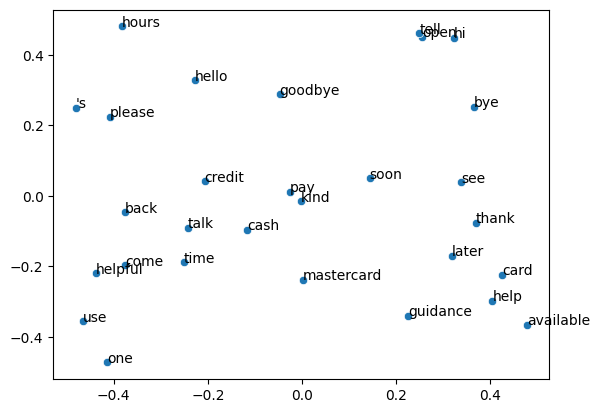

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x= x, y= y )

for i, word in enumerate(list(keys)):
    plt.text(x=x[i],y=y[i],s=word)

In [144]:
vectors = []
for word in list(keys):
    vect = model.wv[word]
    vectors.append(vect)

In [145]:
vectors = pd.DataFrame(vectors, columns=['x', 'y'])


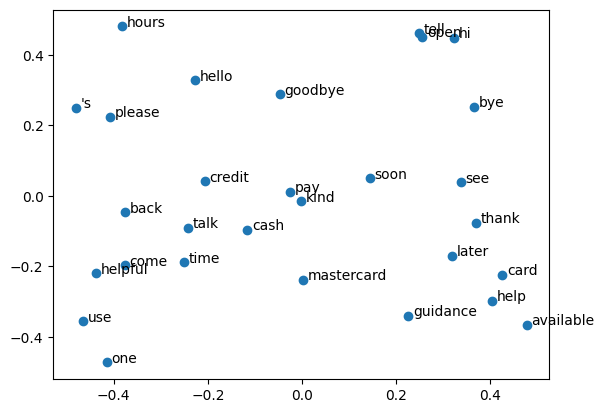

In [147]:
plt.scatter(vectors['x'], vectors['y'])
for i in range(len(list(keys))):
    plt.annotate(xy=(vectors.loc[i, 'x']+0.01, vectors.loc[i, 'y']), text=list(keys)[i])

In [148]:
cosine_similarity(model.wv['tell'].reshape(1, -1),
                  model.wv['open'].reshape(1, -1))

array([[0.9997937]], dtype=float32)

In [149]:
cosine_similarity(model.wv['tell'].reshape(1, -1),
                  model.wv['mastercard'].reshape(1, -1))

array([[-0.87575763]], dtype=float32)

In [151]:
model.wv.most_similar('help')

[('available', 0.9997782707214355),
 ('later', 0.99005126953125),
 ('card', 0.9887735843658447),
 ('guidance', 0.9393491148948669),
 ('thank', 0.909856379032135),
 ('see', 0.7338290810585022),
 ('mastercard', 0.5991546511650085),
 ('soon', 0.5686678886413574),
 ('kind', 0.4905630648136139),
 ('bye', 0.32444697618484497)]

In [155]:
dissimilar_words = model.wv.doesnt_match('''see you later, thanks for visiting'''.split())
print(dissimilar_words) 

see
